## **Reinforcement Learning: Cart Pole**

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from collections import defaultdict
import math

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Iterations that were run: 16


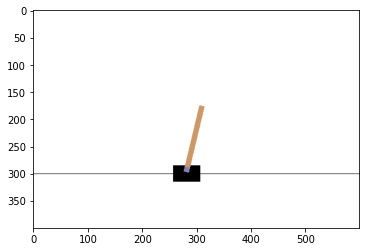

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

In [ ]:
stateSpaceSize = env.observation_space
print(stateSpaceSize)

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


In [ ]:
actionSpaceSize = env.action_space.n
print(actionSpaceSize)

2


In [ ]:
env.reset()
action = env.action_space.sample()
obs, reward, done, info = env.step(action)
print("obs=",obs,"reward=",reward,"done=",done,"info=",info)

obs= [ 0.00400527 -0.15579706 -0.02907732  0.27265893] reward= 1.0 done= False info= {}


In [ ]:
def round_state(state) :
  for i in range(len(state)) :
    state[i] = round(state[i],1)
  return state

In [ ]:
env.reset()
action = env.action_space.sample()
obs, reward, done, info = env.step(action)
state = tuple(round_state(obs))
Q = defaultdict(lambda: np.zeros(actionSpaceSize))
Q[state][action] = 1
Q

defaultdict(<function __main__.<lambda>>,
            {(-0.0, -0.1, 0.0, 0.3): array([1., 0.])})

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
avg_iter = 0

for k in range(100) :
  env.reset()
  for i in range(10000):
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    if done:
      avg_iter = avg_iter + i
      break
  
  env.close()

avg_iter = avg_iter / 100
print("Average iterations that were run:",avg_iter)

Average iterations that were run: 20.84


In [ ]:
def generate_episode(env,episode) :
  state = env.reset()
  state = tuple(round_state(state))
  action = np.random.choice(np.arange(actionSpaceSize))
  for i in range(50000):
    next_state, reward, done, info = env.step(action)
    next_state = tuple(round_state(next_state))
    next_action = np.random.choice(np.arange(actionSpaceSize))

    episode.append((state, action, reward))
    state = next_state
    action = next_action
    if done:
      break

In [ ]:
def test_MC(Q) :
  env = gym.make("CartPole-v0")
  env.reset()
  avg_iter = 0

  for k in range(100) :
    state = env.reset()
    state = tuple(round_state(state))

    for i in range(10000):
      action = np.argmax(Q[state])
      obs, reward, done, info = env.step(action)
      next_state = tuple(round_state(obs))
      state = next_state
  
      if done:
         break
  
    env.close()
    avg_iter = avg_iter + i

  avg_iter = avg_iter / 100
  #print("Average iterations that were run:",avg_iter)
  return avg_iter

In [ ]:
def off_MC_control(env, max_episodes,gamma):
  ## initial Q, C
  Q = defaultdict(lambda: np.zeros(actionSpaceSize))
  C = defaultdict(lambda: np.zeros(actionSpaceSize))

  ## Loop forever
  for eps in range(max_episodes+1) :
    # for any soft policy
    b = np.ones(actionSpaceSize) / actionSpaceSize
    # generate an episode, where T = 500
    episode = []
    generate_episode(env,episode)

    G = 0
    W = 1

    # loop for each episode, t = T-1,T-2,...,0
    for t in range(len(episode)-1, -1, -1):
      state, action, reward = episode[t]
      G = gamma * G + reward # gamma * G + R_{t+1}
      C[state][action] = C[state][action] + W  # C + W
      Q[state][action] = Q[state][action] + (G-Q[state][action])*(W/C[state][action])
      pi_S_t = np.argmax(Q[state])
      # exit inner loop to next episode
      if action !=  pi_S_t:
        break
      W = W * 1./b[action]
    
    if eps % 2000 == 0:
      avg_iter = test_MC(Q)
      print("For episode",eps,"Average is",avg_iter)

  return Q

In [ ]:
Q = off_MC_control(env, 20000, 1)

For episode 0 Average is 36.1
For episode 2000 Average is 81.34
For episode 4000 Average is 63.94
For episode 6000 Average is 90.9
For episode 8000 Average is 64.54
For episode 10000 Average is 90.72
For episode 12000 Average is 96.5
For episode 14000 Average is 97.98
For episode 16000 Average is 87.8
For episode 18000 Average is 94.96
For episode 20000 Average is 104.34
